In [1]:
import cv2

img = cv2.imread("images/R1.jpg", 1)

resized = cv2.resize(img, None, fx=2,fy=2, interpolation=cv2.INTER_CUBIC)
cv2.imshow("Original Image", img)
cv2.imshow("Resized Image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

# Filters

In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread("images/denoising/noise.jpg", 1)
kernel = np.ones((3,3), np.float32)/9
filt_2D = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (3,3))
gaussian_blur = cv2.GaussianBlur(img, (3,3), 0)
median_blur = cv2.medianBlur(img, 3)
bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)

cv2.imshow("Original", img)
cv2.imshow("Median Filter", median_blur)
cv2.imshow("Bilateral Filter", bilateral_blur)
cv2.imshow("Original", img)

cv2.waitKey(0)
cv2.destroyAllWindows()


: 

# CLAHE and Thresholding

In [ ]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread("images/denoising/noise.jpg",0)
eq_img = cv2.equalizeHist(img) #-> expands the histogram throughout

plt.hist(eq_img.flat, bins=100, range=(0,255))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)

cv2.imshow("Equalized image", eq_img)
cv2.imshow("CLAHE image", cl_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Binary Threshold 2')

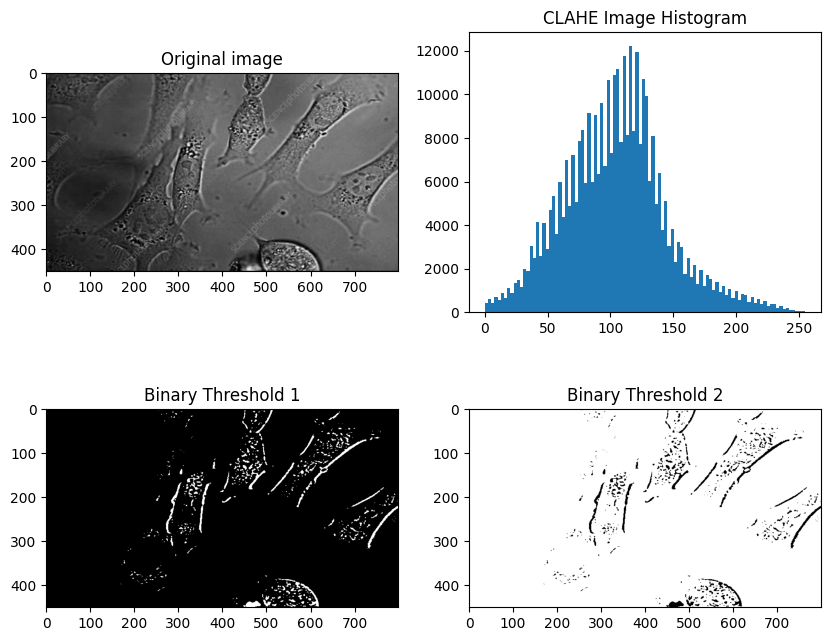

In [8]:
# Thresholding 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread("images/denoising/noise.jpg",0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# CLAHE Image Histogram
axes[0, 1].hist(cl_img.flat, bins=100, range=(0, 255))
axes[0, 1].set_title('CLAHE Image Histogram')

ret, thresh1 = cv2. threshold(cl_img, 190, 150, cv2. THRESH_BINARY)
ret, thresh2 = cv2. threshold(cl_img, 190, 255, cv2. THRESH_BINARY_INV)

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original image")

# Binary Threshold 1
axes[1, 0].imshow(thresh1, cmap='gray')
axes[1, 0].set_title('Binary Threshold 1')

# Binary Threshold 2
axes[1, 1].imshow(thresh2, cmap='gray')
axes[1, 1].set_title('Binary Threshold 2')

Text(0.5, 1.0, 'OTSU')

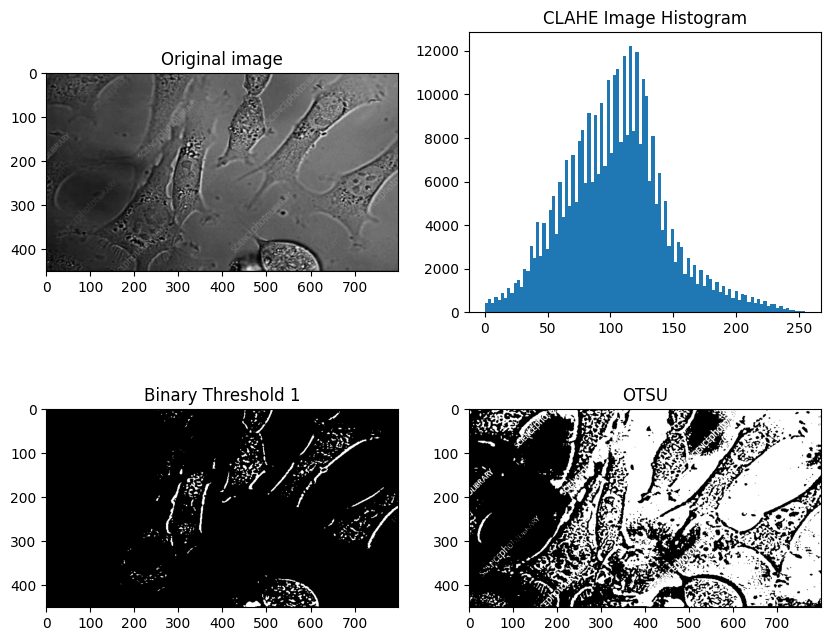

In [9]:
#Using otsu for thrsholding

# Thresholding 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread("images/denoising/noise.jpg",0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# CLAHE Image Histogram
axes[0, 1].hist(cl_img.flat, bins=100, range=(0, 255))
axes[0, 1].set_title('CLAHE Image Histogram')

ret, thresh1 = cv2. threshold(cl_img, 190, 150, cv2.THRESH_BINARY)
ret, thresh2 = cv2. threshold(cl_img, 190, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original image")

# Binary Threshold 1
axes[1, 0].imshow(thresh1, cmap='gray')
axes[1, 0].set_title('Binary Threshold 1')

# Binary Threshold 2
axes[1, 1].imshow(thresh2, cmap='gray')
axes[1, 1].set_title('OTSU')

# Morphological Operations 

Text(0.5, 1.0, 'Opened image')

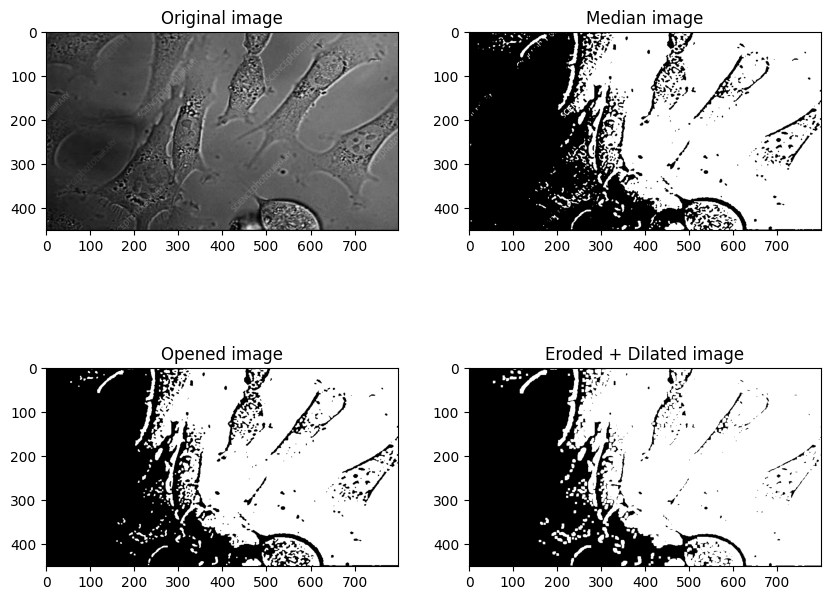

In [19]:
# Erosion, dilation and Opening
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2. imread ("images/denoising/noise.jpg", 0)
median = cv2.medianBlur(img, 3)

ret, th = cv2. threshold(median, 0, 255, cv2. THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones ((3,3), np.uint8)
erosion = cv2.erode(th, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=2)

opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title("Original image")

axes[0,1].imshow(th, cmap='gray')
axes[0,1].set_title("Median image")

# axes[1,0].imshow(erosion, cmap='gray')
# axes[1,0].set_title("Erosion image")

axes[1,1].imshow(dilation, cmap='gray')
axes[1,1].set_title("Eroded + Dilated image")

axes[1,0].imshow(opening, cmap='gray')
axes[1,0].set_title("Opened image")